In [8]:
%load_ext autoreload
%autoreload 2

In [ ]:
var_code = "137"
var = "IWV"
pool_path = f"/pool/data/ERA5/E5/sf/an/1H/{var_code}/"

out_path = f"/work/aa0238/a271093/data/ERA5/1979-2023/ICON_remapped_3x/{var}/"



cdo = Cdo()

for year in np.arange(year_start,year_end,1):
    print (year)
    paths = glob.glob(f"{pool_path}E5sf00_1H_{year}-*_{var_code}.grb")
    
    cdo.mergetime(input=' '.join(paths),
                  output= f"{out_path}dummy.grb")



    cdo.remapbil("/work/aa0238/a271093/data/input/IVT_95_percentiles_CNMR_control_3dx3dy.nc",
        input = f" -chname,var{var_code},{var} {out_path}dummy.grb",
        output = f"{out_path}{var}_{year}010100-{year}123123_remapped_3x.nc",
        options ="-R -f nc"
            )
    
    os.remove(f"{out_path}dummy.grb")

    

In [15]:
var_code = "137"
pool_path = f"/pool/data/ERA5/E5/sf/an/1H/{var_code}/"

paths = glob.glob(f"{pool_path}E5sf00_1H_{year}-*_{var_code}.grb")
'-sellevel,85000 '+' -sellevel,85000 '.join(paths)

'-sellevel,85000 /pool/data/ERA5/E5/sf/an/1H/137/E5sf00_1H_1979-07-29_137.grb -sellevel,85000 /pool/data/ERA5/E5/sf/an/1H/137/E5sf00_1H_1979-09-15_137.grb -sellevel,85000 /pool/data/ERA5/E5/sf/an/1H/137/E5sf00_1H_1979-03-31_137.grb -sellevel,85000 /pool/data/ERA5/E5/sf/an/1H/137/E5sf00_1H_1979-10-09_137.grb -sellevel,85000 /pool/data/ERA5/E5/sf/an/1H/137/E5sf00_1H_1979-08-11_137.grb -sellevel,85000 /pool/data/ERA5/E5/sf/an/1H/137/E5sf00_1H_1979-07-09_137.grb -sellevel,85000 /pool/data/ERA5/E5/sf/an/1H/137/E5sf00_1H_1979-12-03_137.grb -sellevel,85000 /pool/data/ERA5/E5/sf/an/1H/137/E5sf00_1H_1979-03-07_137.grb -sellevel,85000 /pool/data/ERA5/E5/sf/an/1H/137/E5sf00_1H_1979-07-02_137.grb -sellevel,85000 /pool/data/ERA5/E5/sf/an/1H/137/E5sf00_1H_1979-06-03_137.grb -sellevel,85000 /pool/data/ERA5/E5/sf/an/1H/137/E5sf00_1H_1979-09-20_137.grb -sellevel,85000 /pool/data/ERA5/E5/sf/an/1H/137/E5sf00_1H_1979-06-17_137.grb -sellevel,85000 /pool/data/ERA5/E5/sf/an/1H/137/E5sf00_1H_1979-11-03_137.gr

In [ ]:
var_code = "130"
var = "T850"
pool_path = f"/pool/data/ERA5/E5/pl/an/1H/{var_code}/"

out_path = f"/work/aa0238/a271093/data/ERA5/1979-2023/ICON_remapped_3x/{var}/"



cdo = Cdo()

for year in np.arange(year_start,year_end,1):
    print (year)
    paths = glob.glob(f"{pool_path}E5pl00_1H_{year}-*_{var_code}.grb")
    cdo.mergetime(input='-sellevel,85000 '+' -sellevel,85000 '.join(paths),
                  output= f"{out_path}dummy.grb")



    cdo.remapbil("/work/aa0238/a271093/data/input/IVT_95_percentiles_CNMR_control_3dx3dy.nc",
        input = f" -chname,var{var_code},{var} {out_path}dummy.grb",
        output = f"{out_path}{var}_{year}010100-{year}123123_remapped_3x.nc",
        options ="-R -f nc"
            )
    
    os.remove(f"{out_path}dummy.grb")

1999
2000
2001
2002
2003
2004


In [7]:
year_start = 1979
year_end = 2023

cdo = Cdo()

for year in np.arange(year_start,year_end,1):
    print (year)

    out_path = f"/work/aa0238/a271093/data/ERA5/1979-2023/ICON_remapped_3x/"

    cdo.hourmean(input= f" -expr,'IVT=sqrt(IVTv^2+IVTu^2)'  -merge {out_path}IVTu/IVTu_{year}010100-{year}123123_remapped_3x.nc {out_path}IVTv/IVTv_{year}010100-{year}123123_remapped_3x.nc ",
                output = f"{out_path}IVT/IVT_{year}010100-{year}123123_remapped_3x.nc")

1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022


In [20]:
%load_ext autoreload
%autoreload 2
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import datetime
import cartopy
from metpy.units import units
import cartopy.crs as ccrs
import pickle
import os

from src.utils import * 
from src.Corrections import * 
from src.Enumerations import Month, Season, Experiments, Domains
from src.xarray_util import create_obj_from_dict,  ObjectContainer,  load_tracking_objects
from src.plot_funcs import plot_unstructured_rotated_grid, plot_contourf_rotated_grid


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Settings

In [2]:
exp_ICON_ERA5=Experiments.ICON_ERA5.value
exp_ERA5=Experiments.ERA5.value

input_path_ICON_ERA5= exp_ICON_ERA5.path_IVT_tracking
input_path_ERA5= exp_ERA5.path_IVT_tracking


type_='IVT'
input_file_name_temp_ERA5 = 'MOAPP_ERA5_100and85controlperc_remapped_3x'
input_file_name_temp_ICON_ERA5 = 'MOAPP_ICON_ERA5_100and85ERA5perc_remapped_3x'

first_year = 1998
last_year = 2022
num_years = last_year-first_year

## Load pickle dictionaries into in-memory Datasets

In [6]:
IVT_objs_ICON_ERA5 = load_tracking_objects(input_path_ICON_ERA5,
                                      input_file_name_temp_ICON_ERA5,
                                      type_, first_year,
                                      last_year,
                                      load_coordinates=True,
                                      exp=exp_ICON_ERA5,
                                      
                                     
                                      )
    
    

/work/aa0238/a271093/results/MOAAP/IVT_Tracking/ICON_DRIVENBY_ERA5_remapped_3x/Object_container_1998-1999 exists. Loading...


In [3]:
IVT_objs_ERA5 = load_tracking_objects(input_path_ERA5,
                                      input_file_name_temp_ERA5,
                                      type_,
                                      first_year,
                                      last_year,
                                      load_coordinates=True,
                                      #compute_hist = True,
                                      compute_hist = False,
                                      exp=exp_ERA5,
                                      #var_names_ls = ["IVTu","IVTv"],
                                      #var_paths_ls = ["/work/aa0238/a271093/data/ERA5/1979-2023/ICON_remapped_3x/IVTu/",
                                      #               "/work/aa0238/a271093/data/ERA5/1979-2023/ICON_remapped_3x/IVTv/"]
                                      
                                      )

/work/aa0238/a271093/results/MOAAP/IVT_Tracking/ERA5_ICON_remapped_3x/Object_container_1998-2022 exists. Loading...


Season.DJF
Season.MAM
Season.JJA
Season.SON


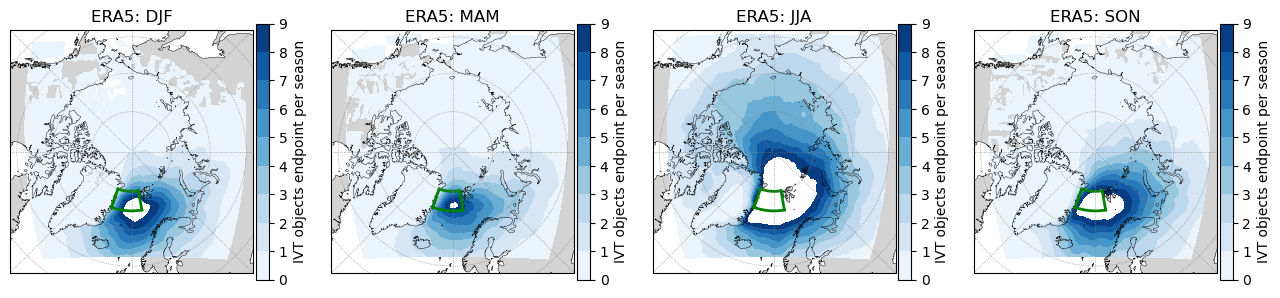

In [37]:
fig = plt.figure(figsize=(13,3))
subplts = (1,4)
levels=np.arange(0,10,1)
for  season_,i in zip(Season,[0,1,2,3]):
    
    print (season_)
    
        
    
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).sel_by_domain(Domains.GREENLAND_SEA.value,type_="anytime", domain_frac = 0.3, select_last_timesteps=True)


    lon,lat,z = count_objs_grid_points(IVTobjs_sel_ERA5, normalization_factor=24)
    
    # normalize grid point counts to counts per season
    z= (z/num_years)*1.000001
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i ,
                                  levels = levels,
                                   subplts=subplts,
                                  title='ERA5: '+ season_.name,
                                  cbar_label = "IVT objects after passing region per season",
                                  plot_domains={Domains.GREENLAND_SEA : 'green'},
                                  cbar=True)
        
   
    
plt.tight_layout()

Season.DJF


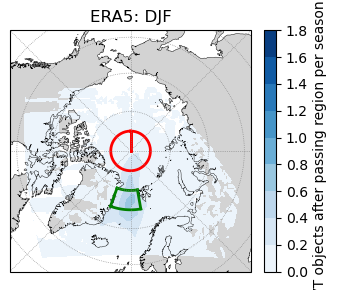

In [16]:
fig = plt.figure(figsize=(13,3))
subplts = (1,1)
levels=np.arange(0,2,0.2)
#for  season_,i in zip(Season,[0,1,2,3]):
for  season_,i in zip([Season.DJF],[0]):
    
    print (season_)
    
        
    
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_) \
                                    .sel_by_domain(Domains.GREENLAND_SEA.value,type_="anytime", domain_frac = 0.3, select_last_timesteps=True) \
                                    .sel_by_domain(Domains.CENTRAL_ARCTIC.value,type_="end")


    lon,lat,z = count_objs_grid_points(IVTobjs_sel_ERA5, normalization_factor=24)
    
    # normalize grid point counts to counts per season
    z= (z/num_years)*1.000001
    
    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i ,
                                  levels = levels,
                                   subplts=subplts,
                                  title='ERA5: '+ season_.name,
                                  cbar_label = "IVT objects after passing region per season",
                                  plot_domains={Domains.GREENLAND_SEA.value : 'green',
                                               Domains.CENTRAL_ARCTIC.value : 'red'},
                                  cbar=True)
        
   
    
plt.tight_layout()

Season.DJF
Season.MAM
Season.JJA
Season.SON


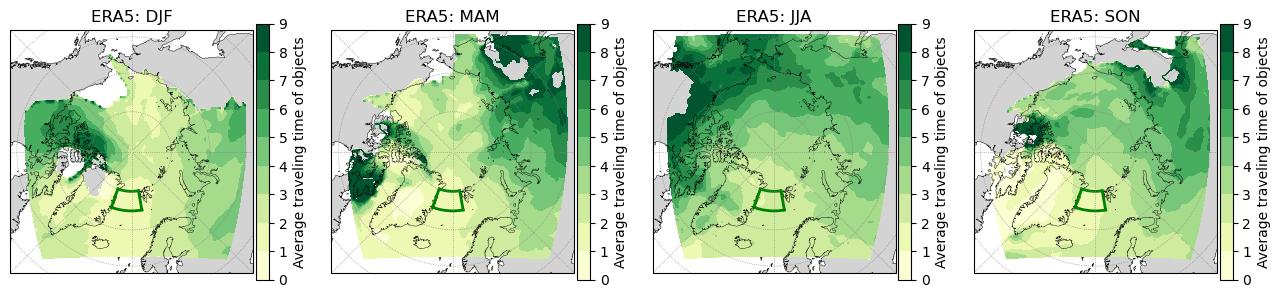

In [16]:
fig = plt.figure(figsize=(13,3))
subplts = (1,4)
levels=np.arange(0,10,1)
for  season_,i in zip(Season,[0,1,2,3]):
    
    print (season_)
    
        
    
        
    IVTobjs_sel_ERA5 = IVT_objs_ERA5.sel_season(season_).sel_by_domain(Domains.GREENLAND_SEA,type_="anytime", domain_frac = 0.3, select_last_timesteps=True)

    lon,lat,z = calculate_average_ellapsed_time(IVTobjs_sel_ERA5, normalization_factor=24)
    
   

    plot_unstructured_rotated_grid(lon,
                                  lat, 
                                  z, 
                                  fig=fig,
                                  index = i ,
                                  levels = levels,
                                   subplts=subplts,
                                  title='ERA5: '+ season_.name,
                                   cmap="YlGn",
                                  cbar_label = "Average traveling time of objects",
                                  plot_domains={Domains.GREENLAND_SEA : 'green'},
                                  cbar=True)
        
   
    
plt.tight_layout()


In [14]:
b= IVT_objs_ERA5.sel_by_domain(Domains.NORTH_ATLANTIC,type_="anytime", domain_frac = 0.3, select_last_timesteps=True)

In [1]:
from src.Enumerations import Month, Season, Experiments, Domains
domain_points = Domains.GREENLAND_SEA.value.get_gridpoint_field(regular=False)

/work/aa0238/a271093/Conda/MOAAP_env/lib/python3.12/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


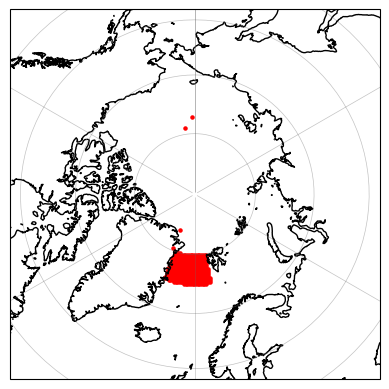

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs


domain_points = Domains.GREENLAND_SEA.value.get_gridpoint_field(regular=False)
domain_lats = np.array([x.lat for x in domain_points])
domain_lons = np.array([x.lon for x in domain_points])

fig,ax=plt.subplots(1,1,subplot_kw={'projection': ccrs.Orthographic(0,90)})

pole_lon = 0
pole_lat = 6.55
crs_arctic = ccrs.RotatedPole(pole_longitude=pole_lon, pole_latitude=pole_lat)

ax.scatter(domain_lons,domain_lats,s=5,c='r',transform=crs_arctic)

ax.coastlines()
ax.set_extent([-180,180, 58, 90], crs=ccrs.PlateCarree())
ax.gridlines(linewidth=0.5,color='dimgray',alpha=0.4,zorder=2)

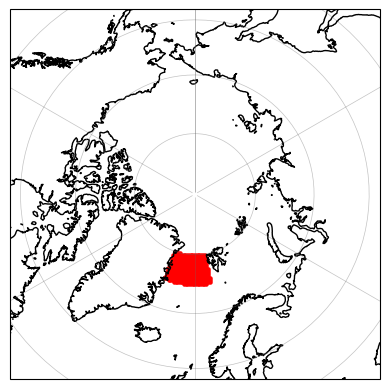

In [19]:
reg = Domains.GREENLAND_SEA.value.get_gridpoint_field(regular=True)
rot = Domains.GREENLAND_SEA.value.get_gridpoint_field(regular=False)

In [20]:
rot

[RotatedGridPoint(lat=16.0, lon=3.4000000953674316),
 RotatedGridPoint(lat=16.299999237060547, lon=2.5),
 RotatedGridPoint(lat=16.299999237060547, lon=2.799999952316284),
 RotatedGridPoint(lat=16.299999237060547, lon=3.0999999046325684),
 RotatedGridPoint(lat=16.299999237060547, lon=3.4000000953674316),
 RotatedGridPoint(lat=16.600000381469727, lon=-1.7000000476837158),
 RotatedGridPoint(lat=16.600000381469727, lon=-1.399999976158142),
 RotatedGridPoint(lat=16.600000381469727, lon=-1.100000023841858),
 RotatedGridPoint(lat=16.600000381469727, lon=-0.800000011920929),
 RotatedGridPoint(lat=16.600000381469727, lon=-0.5),
 RotatedGridPoint(lat=16.600000381469727, lon=-0.20000000298023224),
 RotatedGridPoint(lat=16.600000381469727, lon=0.10000000149011612),
 RotatedGridPoint(lat=16.600000381469727, lon=0.4000000059604645),
 RotatedGridPoint(lat=16.600000381469727, lon=0.699999988079071),
 RotatedGridPoint(lat=16.600000381469727, lon=1.0),
 RotatedGridPoint(lat=16.600000381469727, lon=1.299

In [54]:
l=[x.lat for x in rot]

In [1]:
from src.GridPoints import *
import sys
a=GridPoint.grid_field
np.set_printoptions(threshold=sys.maxsize)

/work/aa0238/a271093/Conda/MOAAP_env/lib/python3.12/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [17]:
k=list(rot2reg_dict.keys())[0]
RegularGridPoint(*rot2reg_dict[k])

RegularGridPoint(lat=47.6286735534668, lon=137.57164001464844)

In [3]:
k=0
for p in RotatedGridPoint.get_all_gridpoints():
    lat = p.lat
    lon = p.lon
    r0 =  RotatedGridPoint(lat=lat, lon=lon)
    reg = r0.to_regular()
    rot = reg.to_rotated()

    print (r0, rot)
print (k)

RotatedGridPoint(lat=-24.200000762939453, lon=-29.899999618530273) RotatedGridPoint(lat=-24.200000762939453, lon=-29.899999618530273)
RotatedGridPoint(lat=-24.200000762939453, lon=-29.600000381469727) RotatedGridPoint(lat=-24.200000762939453, lon=-29.600000381469727)
RotatedGridPoint(lat=-24.200000762939453, lon=-29.299999237060547) RotatedGridPoint(lat=-24.200000762939453, lon=-29.299999237060547)
RotatedGridPoint(lat=-24.200000762939453, lon=-29.0) RotatedGridPoint(lat=-24.200000762939453, lon=-29.0)
RotatedGridPoint(lat=-24.200000762939453, lon=-28.700000762939453) RotatedGridPoint(lat=-24.200000762939453, lon=-28.700000762939453)
RotatedGridPoint(lat=-24.200000762939453, lon=-28.399999618530273) RotatedGridPoint(lat=-24.200000762939453, lon=-28.399999618530273)
RotatedGridPoint(lat=-24.200000762939453, lon=-28.100000381469727) RotatedGridPoint(lat=-24.200000762939453, lon=-28.100000381469727)
RotatedGridPoint(lat=-24.200000762939453, lon=-27.799999237060547) RotatedGridPoint(lat=-2

In [10]:
#r = RegularGridPoint(lat=61.92865753173828, lon=13.702667236328125)
r= RotatedGridPoint(lat=-22.100000381469727, lon=4.300000190734863)

lat_idx = np.argwhere(GridPoint.rotated_lat_grid == r.lat)[0, 0]
lon_idx = np.argwhere(GridPoint.rotated_lon_grid == r.lon)[0, 1]

lat = GridPoint.regular_lat_grid[lat_idx, lon_idx]
lon = GridPoint.regular_lon_grid[lat_idx, lon_idx]

In [11]:
np.argwhere(GridPoint.rotated_lat_grid == r.lat)

array([[  7,   0],
       [  7,   1],
       [  7,   2],
       [  7,   3],
       [  7,   4],
       [  7,   5],
       [  7,   6],
       [  7,   7],
       [  7,   8],
       [  7,   9],
       [  7,  10],
       [  7,  11],
       [  7,  12],
       [  7,  13],
       [  7,  14],
       [  7,  15],
       [  7,  16],
       [  7,  17],
       [  7,  18],
       [  7,  19],
       [  7,  20],
       [  7,  21],
       [  7,  22],
       [  7,  23],
       [  7,  24],
       [  7,  25],
       [  7,  26],
       [  7,  27],
       [  7,  28],
       [  7,  29],
       [  7,  30],
       [  7,  31],
       [  7,  32],
       [  7,  33],
       [  7,  34],
       [  7,  35],
       [  7,  36],
       [  7,  37],
       [  7,  38],
       [  7,  39],
       [  7,  40],
       [  7,  41],
       [  7,  42],
       [  7,  43],
       [  7,  44],
       [  7,  45],
       [  7,  46],
       [  7,  47],
       [  7,  48],
       [  7,  49],
       [  7,  50],
       [  7,  51],
       [  7,

In [15]:
RotatedGridPoint.regular_lat_grid

array([[47.628674, 47.829224, 48.028698, 48.227085, 48.424366, 48.62053 ,
        48.81556 , 49.00943 , 49.202137, 49.393654, 49.583973, 49.773067,
        49.960926, 50.147526, 50.332855, 50.516895, 50.699623, 50.88102 ,
        51.061073, 51.23976 , 51.41706 , 51.59296 , 51.767433, 51.940464,
        52.11203 , 52.282112, 52.450687, 52.617744, 52.783253, 52.947193,
        53.10955 , 53.270298, 53.429413, 53.58688 , 53.742672, 53.89677 ,
        54.049156, 54.1998  , 54.348682, 54.49578 , 54.641075, 54.784542,
        54.92616 , 55.065903, 55.20375 , 55.33968 , 55.473667, 55.605694,
        55.73573 , 55.863758, 55.989754, 56.113693, 56.235554, 56.355316,
        56.472954, 56.588444, 56.701767, 56.8129  , 56.92182 , 57.028507,
        57.13294 , 57.23509 , 57.334938, 57.43247 , 57.527657, 57.620483,
        57.710926, 57.798965, 57.884583, 57.967754, 58.048466, 58.126698,
        58.20243 , 58.275646, 58.346325, 58.414455, 58.480015, 58.54299 ,
        58.60337 , 58.661133, 58.71626

In [6]:
IVT_objs_ERA5[0]

<xarray.Dataset> Size: 6kB
Dimensions:          (times: 64)
Coordinates:
  * times            (times) datetime64[ns] 512B 1998-01-01T01:00:00 ... 1998...
Data variables: (12/15)
    id_              <U6 24B '190001'
    exp              object 8B <class 'src.Experiments_infos.ERA5'>
    size             (times) float64 512B 1.279e+05 1.617e+05 ... 1.363e+04
    total_IVT        (times) float32 256B 1.432e+04 1.881e+04 ... 1.354e+03
    mean_IVT         (times) float32 256B 114.6 119.1 124.8 ... 111.0 104.2
    max_IVT          (times) float32 256B 153.2 167.8 181.9 ... 137.1 107.8
    ...               ...
    track            (times) object 512B RotatedGridPoint(lat=-23.0, lon=-11....
    speed            (times) float64 512B nan 39.53 30.08 ... 63.3 139.7 67.02
    gridpoints       (times) object 512B [RotatedGridPoint(lat=-24.2000007629...
    IVTu             (times) object 512B {RotatedGridPoint(lat=-24.2000007629...
    IVTv             (times) object 512B {RotatedGridPoint(lat=-24.2000007629...
    history          (times) int64 512B 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0

In [28]:
import random

zufallszahl = random.uniform(1, 900)

In [16]:
float(round(4.6))

5.0

In [33]:
a=IWV(4.3)
b=IWV(3.7)

In [34]:
a is b

True

In [36]:
import glob
files = glob.glob("/work/aa0238/a271093/data/ERA5/1979-2023/ICON_remapped_3x/IVTu/*.nc")
a=xr.open_mfdataset(files)

In [41]:
a.sel(time="1979-01-01T02:00:00").IVTu.values.shape

(194, 193)

In [3]:
isinstance(slice(0,4,1),slice)

True

In [10]:
for i in [1,2]:
    x=10000*i
    print (id(x))


140737071559440
140737071558576


In [ ]:
import ctypes

# Konvertiere die Speicheradresse zurück in ein Objekt
obj_from_address = ctypes.cast(140737071559440, ctypes.py_object).value
print(f"Objekt von der Adresse: {obj_from_address}")